In [1]:
cd Documents/GitHub/La_Jara/Hysteresis/SM2022-Constituents

[WinError 3] The system cannot find the path specified: 'Documents/GitHub/La_Jara/Hysteresis/SM2022-Constituents'
c:\Users\nicol\Documents\GitHub\La_Jara\Hysteresis\SM2022-Constituents


In [2]:
#Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

#Import Data
storm1 = pd.read_csv('Storm1_2022.csv')
storm2 = pd.read_csv('Storm2_2022.csv')

In [10]:
storm2

,Time,SS,Botttle,Depth,DOC
0,8/8/2022 13:43,0.00,1,7.000,3.359
1,8/8/2022 13:58,0.00,2,7.583,3.424
2,8/8/2022 14:28,204.03,4,8.867,5.279
3,8/8/2022 14:43,105.77,5,8.983,7.207
4,8/8/2022 15:23,68.83,7,7.875,8.410
5,8/8/2022 16:13,36.65,11,7.584,2.705
6,8/8/2022 16:28,25.92,12,7.409,8.421
7,8/8/2022 16:58,19.05,14,7.409,8.183
8,8/8/2022 17:28,18.36,16,7.408,2.742
9,8/8/2022 18:13,0.00,19,7.350,8.085


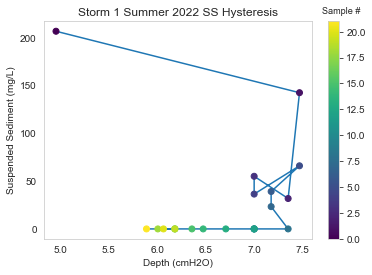

In [13]:
# Storm 1: Suspended Sediment Hysteresis
plt.plot(storm1['Depth'], storm1['SS'], zorder=0)
cm = plt.cm.get_cmap('viridis')
sc = plt.scatter(storm1['Depth'], storm1['SS'], c=range(22), cmap=cm, zorder=100)

plt.colorbar(sc)
plt.text(7.7,225,'Sample #', fontsize=9)

plt.xlabel("Depth (cmH2O)")
plt.ylabel("Suspended Sediment (mg/L)")
plt.title("Storm 1 Summer 2022 SS Hysteresis")

plt.grid()
#sns.set_style("whitegrid")
plt.savefig("Storm1_SS_Hysteresis.png", dpi=300)
plt.show()

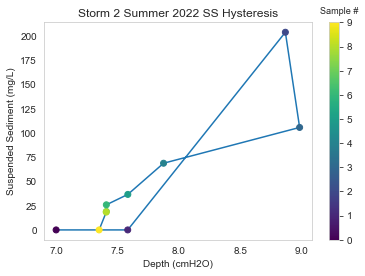

In [12]:
# Storm 2: Suspended Sediment Hysteresis
plt.plot(storm2['Depth'], storm2['SS'], zorder=0)
cm = plt.cm.get_cmap('viridis')
sc = plt.scatter(storm2['Depth'], storm2['SS'], c=range(10), cmap=cm, zorder=100)

plt.colorbar(sc)
plt.text(9.15,223,'Sample #', fontsize=9)

plt.xlabel("Depth (cmH2O)")
plt.ylabel("Suspended Sediment (mg/L)")
plt.title("Storm 2 Summer 2022 SS Hysteresis")

plt.grid()
sns.set_style("whitegrid")
plt.savefig("Storm2_SS_Hysteresis.png", dpi=300)
plt.show()

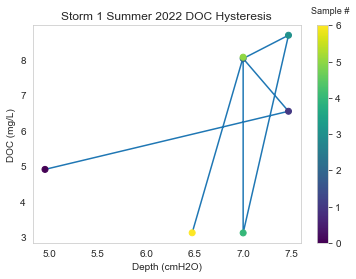

In [14]:
# Storm 1: DOC Hysteresis
plt.plot(storm1['DOCdepth'], storm1['DOC'], zorder=0)
cm = plt.cm.get_cmap('viridis')
sc = plt.scatter(storm1['DOCdepth'], storm1['DOC'], c=range(22), cmap=cm, zorder=100)

plt.colorbar(sc)
plt.text(7.7,9.3,'Sample #', fontsize=9)

plt.xlabel("Depth (cmH2O)")
plt.ylabel("DOC (mg/L)")
plt.title("Storm 1 Summer 2022 DOC Hysteresis")

plt.grid()
sns.set_style("whitegrid")
plt.savefig("Storm1_DOC_Hysteresis.png", dpi=300)
plt.show()

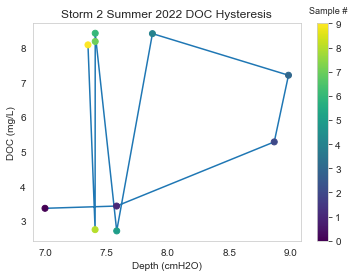

In [15]:
# Storm 2: Suspended Sediment Hysteresis
plt.plot(storm2['Depth'], storm2['DOC'], zorder=0)
cm = plt.cm.get_cmap('viridis')
sc = plt.scatter(storm2['Depth'], storm2['DOC'], c=range(10), cmap=cm, zorder=100)

plt.colorbar(sc)
plt.text(9.15,9,'Sample #', fontsize=9)

plt.xlabel("Depth (cmH2O)")
plt.ylabel("DOC (mg/L)")
plt.title("Storm 2 Summer 2022 DOC Hysteresis")

plt.grid()
sns.set_style("whitegrid")
plt.savefig("Storm2_DOC_Hysteresis.png", dpi=300)
plt.show()

## Plots for my AGU poster

In [16]:
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

font = {'fontname':'Tenorite'}

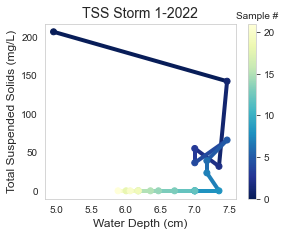

In [21]:
fig, (ax1) = plt.subplots(figsize=(4,3))
#sns.set_style('darkgrid')
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout(h_pad=100)


z = np.linspace(0, 1, len(storm1['Depth']))
colorline(storm1['Depth'], storm1['SS'], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
sc =ax1.scatter(storm1['Depth'], storm1['SS'], c=range(22), cmap=cm, zorder=100)
plt.grid(False)
plt.colorbar(sc, ax=ax1)
plt.text(7.6,224,'Sample #', fontsize=10)
ax1.set_title('TSS Storm 1-2022', fontsize=14)
ax1.set_ylabel("Total Suspended Solids (mg/L)", fontsize=12)
ax1.set_xlabel("Water Depth (cm)", fontsize=12)

plt.savefig("AGU_SS1_Hysteresis.png", bbox_inches = 'tight', dpi=1000)

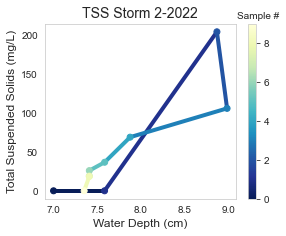

In [23]:
fig, (ax1) = plt.subplots(figsize=(4,3))
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout(h_pad=100)

z = np.linspace(0, 1, len(storm2['Depth']))
colorline(storm2['Depth'], storm2['SS'], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
sc =ax1.scatter(storm2['Depth'], storm2['SS'], c=range(10), cmap=cm, zorder=100)
plt.grid(False)
plt.colorbar(sc, ax=ax1)
plt.text(9.1,221,'Sample #', fontsize=10)
ax1.set_title('TSS Storm 2-2022', fontsize=14)
ax1.set_ylabel("Total Suspended Solids (mg/L)", fontsize=12)
ax1.set_xlabel("Water Depth (cm)", fontsize=12)

plt.savefig("AGU_SS2_Hysteresis.png", bbox_inches = 'tight', dpi=1000)

C:\Users\nicol\AppData\Local\Temp\ipykernel_8116\2304375297.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sc, ax=ax1)


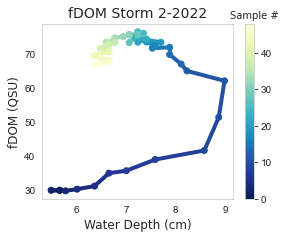

In [76]:
#Import Data
depth = pd.read_csv('Piezo2A-Summer2022.csv').iloc[2576:2625]
sonde = pd.read_csv('Sonde_Summer2022_Storm2.csv').iloc[0:69]
#Putting everything in one df
sonde.rename(columns={'datetime': 'Time'}, inplace=True)
df = pd.merge(depth, sonde, on='Time', how='left')
#Converting into a date-time kind of variable

In [3]:
storm1

,Time,SS,Botttle,Depth,DOC,DOCtime,DOCdepth,SRP,TP,Pdepth,Ptime,Unnamed: 11
0,8/3/2022 15:02,206.82,1,4.959,4.913,8/3/2022 15:02,4.959,0.014906,0.099315,4.959,8/3/2022 15:02,NaN
1,8/3/2022 15:17,142.53,2,7.467,6.550,8/3/2022 15:17,7.467,0.071531,0.101267,7.467,8/3/2022 15:17,NaN
2,8/3/2022 15:32,31.82,3,7.350,8.035,8/3/2022 15:47,7.000,0.054372,0.085650,7.000,8/3/2022 15:47,NaN
3,8/3/2022 15:47,55.06,4,7.000,8.691,8/3/2022 16:17,7.467,0.028633,0.044656,7.000,8/3/2022 18:17,NaN
4,8/3/2022 16:02,36.44,5,7.000,3.124,8/3/2022 18:02,7.000,NaN,NaN,NaN,NaN,NaN
5,8/3/2022 16:17,66.04,6,7.467,8.073,8/3/2022 18:17,7.000,NaN,NaN,NaN,NaN,NaN
6,8/3/2022 16:32,39.15,7,7.175,3.128,8/3/2022 19:02,6.475,NaN,NaN,NaN,NaN,NaN
7,8/3/2022 17:02,23.32,9,7.175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8/3/2022 17:32,0.00,11,7.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8/3/2022 17:47,0.00,12,7.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Hydrographs

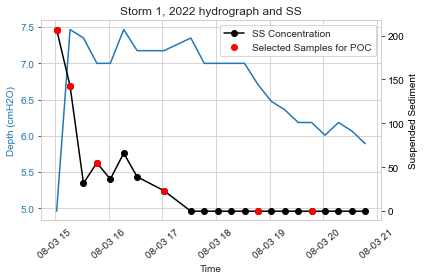

In [7]:
fig, ax1 = plt.subplots()

# Convert the 'Time' column to datetime format
storm1['Time'] = pd.to_datetime(storm1['Time'])

color1 = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Depth (cmH2O)', color=color1)
ax1.plot(storm1['Time'], storm1['Depth'], color=color1, linestyle="-",label='Water Depth')
ax1.tick_params(axis='y', labelcolor=color1)
plt.xticks(rotation=40)

ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

color2 = 'black'
ax2.set_ylabel('Suspended Sediment', color=color2)  # we already handled the x-label with ax1
ax2.plot(storm1['Time'], storm1['SS'], "o-", color=color2, label='SS Concentration')
ax2.tick_params(axis='y', labelcolor=color2)

# Plot select samples with green color
samples_to_plot = [0, 1, 3, 7, 13, 17]
ax2.plot(storm1.loc[samples_to_plot, 'Time'], storm1.loc[samples_to_plot, 'SS'],'o', color='red', label='Selected Samples for POC')

plt.title("Storm 1, 2022 hydrograph and SS")
plt.grid()
sns.set_style("whitegrid")
ax2.legend()

fig.tight_layout()
plt.savefig("storm_1_2022.png", dpi=300)
plt.show()

In [8]:
storm2

,Time,SS,Botttle,Depth,DOC
0,8/8/2022 13:43,0.00,1,7.000,3.359
1,8/8/2022 13:58,0.00,2,7.583,3.424
2,8/8/2022 14:28,204.03,4,8.867,5.279
3,8/8/2022 14:43,105.77,5,8.983,7.207
4,8/8/2022 15:23,68.83,7,7.875,8.410
5,8/8/2022 16:13,36.65,11,7.584,2.705
6,8/8/2022 16:28,25.92,12,7.409,8.421
7,8/8/2022 16:58,19.05,14,7.409,8.183
8,8/8/2022 17:28,18.36,16,7.408,2.742
9,8/8/2022 18:13,0.00,19,7.350,8.085


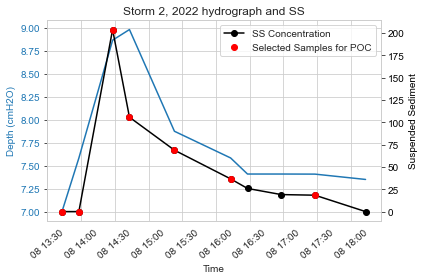

In [14]:
fig, ax1 = plt.subplots()

# Convert the 'Time' column to datetime format
storm2['Time'] = pd.to_datetime(storm2['Time'])

color1 = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Depth (cmH2O)', color=color1)
ax1.plot(storm2['Time'], storm2['Depth'], color=color1, linestyle="-",label='Water Depth')
ax1.tick_params(axis='y', labelcolor=color1)
plt.xticks(rotation=40)

ax2 = ax1.twinx()  # initiate a second axes that shares the same x-axis

color2 = 'black'
ax2.set_ylabel('Suspended Sediment', color=color2)  # we already handled the x-label with ax1
ax2.plot(storm2['Time'], storm2['SS'], "o-", color=color2, label='SS Concentration')
ax2.tick_params(axis='y', labelcolor=color2)

# Plot select samples with green color
samples_to_plot = [0, 1, 2, 3, 4, 5, 8]
ax2.plot(storm2.loc[samples_to_plot, 'Time'], storm2.loc[samples_to_plot, 'SS'],'o', color='red', label='Selected Samples for POC')

plt.title("Storm 2, 2022 hydrograph and SS")
plt.grid()
sns.set_style("whitegrid")
ax2.legend()

fig.tight_layout()
plt.savefig("storm_2_2022.png", dpi=300)
plt.show()